In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_all = pd.read_csv('Kaagle_Upload.csv')
df_all.head()

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (0,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,accident_index,vehicle_reference,vehicle_type,towing_and_articulation,vehicle_manoeuvre,vehicle_location-restricted_lane,junction_location,skidding_and_overturning,hit_object_in_carriageway,vehicle_leaving_carriageway,...,age_band_of_casualty,casualty_severity,pedestrian_location,pedestrian_movement,car_passenger,bus_or_coach_passenger,pedestrian_road_maintenance_worker,casualty_type,casualty_home_area_type,casualty_imd_decile
0,201506E098757,2,9,0,18,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,201506E098766,1,9,0,9,0,8,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,201506E098766,2,9,0,18,0,8,0,0,0,...,8.0,3.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0,3.0
3,201506E098777,1,20,0,4,0,0,0,0,0,...,6.0,3.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0
4,201506E098780,1,9,0,15,0,1,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df = df_all[['journey_purpose_of_driver', 'accident_severity', 'road_type', 'junction_detail', 'junction_control', 'light_conditions', 'weather_conditions', 'road_surface_conditions', 'special_conditions_at_site', 'carriageway_hazards', 'urban_or_rural_area', 'day_of_week', 'age_of_driver', 'age_of_vehicle']]
print(df.shape)
df.head()

(285331, 14)


,journey_purpose_of_driver,accident_severity,road_type,junction_detail,junction_control,light_conditions,weather_conditions,road_surface_conditions,special_conditions_at_site,carriageway_hazards,urban_or_rural_area,day_of_week,age_of_driver,age_of_vehicle
0,6,3,6,3,4,1,1,1,0,0,1,2,45,11
1,6,3,3,6,2,1,1,1,0,0,1,7,25,1
2,6,3,3,6,2,1,1,1,0,0,1,7,51,-1
3,1,3,6,0,-1,1,1,1,0,0,1,4,50,1
4,6,3,6,3,4,1,1,1,0,0,1,6,27,-1


In [4]:
# remove all -1 values as they indicate data is missing
df = df[df['age_of_vehicle'] != -1]
df = df[df['age_of_driver'] != -1]
df = df[df['day_of_week'] != -1]
df = df[df['urban_or_rural_area'] != 3]
df = df[df['carriageway_hazards'] != -1]
df = df[df['special_conditions_at_site'] != -1]
df = df[df['road_surface_conditions'] != -1]
df = df[df['weather_conditions'] != -1]
df = df[df['light_conditions'] != -1]
df = df[df['junction_control'] != -1]
df = df[df['junction_detail'] != -1]
df = df[df['road_type'] != -1]
df = df[df['journey_purpose_of_driver'] != -1]
df = df[df['accident_severity'] != -1]
df.shape


(110842, 14)

### Junction Control

In [5]:
df_jcac = df[['junction_control', 'accident_severity']]
df_jcac

,junction_control,accident_severity
0,4,3
1,2,3
6,2,3
7,2,3
8,2,3
...,...,...
285307,4,3
285312,4,3
285313,4,3
285314,4,3


In [6]:
df_jcac['junction_control'].unique()

array([4, 2, 3, 1], dtype=int64)

In [7]:
df_jcac['junction_control'].replace(0, 'no junction', inplace=True)
df_jcac['junction_control'].replace(1, 'authorized person', inplace=True)
df_jcac['junction_control'].replace(2, 'traffic signal', inplace=True)
df_jcac['junction_control'].replace(3, 'stop sign', inplace=True)
df_jcac['junction_control'].replace(4, 'give way or uncontrolled', inplace=True)
df_jcac

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,junction_control,accident_severity
0,give way or uncontrolled,3
1,traffic signal,3
6,traffic signal,3
7,traffic signal,3
8,traffic signal,3
...,...,...
285307,give way or uncontrolled,3
285312,give way or uncontrolled,3
285313,give way or uncontrolled,3
285314,give way or uncontrolled,3


In [8]:
df_jcac3 = df_jcac[df_jcac['accident_severity'] == 3]
df_jcac2 = df_jcac[df_jcac['accident_severity'] == 2]
df_jcac1 = df_jcac[df_jcac['accident_severity'] == 1]

df_jcac1

,junction_control,accident_severity
377,give way or uncontrolled,1
378,give way or uncontrolled,1
379,give way or uncontrolled,1
920,give way or uncontrolled,1
1314,give way or uncontrolled,1
...,...,...
285244,give way or uncontrolled,1
285245,give way or uncontrolled,1
285246,give way or uncontrolled,1
285247,give way or uncontrolled,1


In [9]:
print(df_jcac3['junction_control'].unique())
print(df_jcac2['junction_control'].unique())
print(df_jcac1['junction_control'].unique())


['give way or uncontrolled' 'traffic signal' 'stop sign'
 'authorized person']
['give way or uncontrolled' 'traffic signal' 'stop sign'
 'authorized person']
['give way or uncontrolled' 'traffic signal' 'stop sign'
 'authorized person']


In [11]:
y3 = df_jcac3['junction_control'].value_counts()
df_jcactot = pd.DataFrame({'accident severity 3': y3})
df_jcactot

,accident severity 3
give way or uncontrolled,77955
traffic signal,17740
stop sign,841
authorized person,150


In [12]:
y2 = df_jcac2['junction_control'].value_counts()
df_jcactot.insert(1, 'accident severity 2', y2, True)
df_jcactot

,accident severity 3,accident severity 2
give way or uncontrolled,77955,11313
traffic signal,17740,1835
stop sign,841,103
authorized person,150,27


In [13]:
y1 = df_jcac1['junction_control'].value_counts()
df_jcactot.insert(2, 'accident severity 2', y1, True)
df_jcactot

,accident severity 3,accident severity 2,accident severity 2
give way or uncontrolled,77955,11313,762
traffic signal,17740,1835,98
stop sign,841,103,16
authorized person,150,27,2


Text(0.5, 1.0, 'Influence of Junction Control type on Accident Severity given a junction')

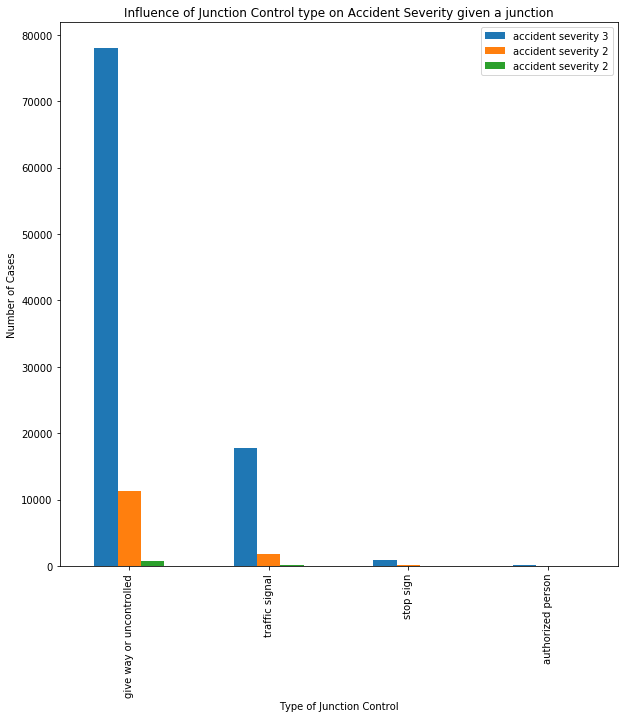

In [14]:
df_jcactot.plot(kind='bar', figsize=(10,10))

plt.xlabel('Type of Junction Control')
plt.ylabel('Number of Cases')
plt.title('Influence of Junction Control type on Accident Severity given a junction')